In [1]:
# External dependencies
import numpy as np
import pandas as pd
import yfinance as yf
from matplotlib import pyplot as plt

In [52]:
def time_series_z_score(data: pd.DataFrame, statistic: str, halflife: int) -> pd.Series:
    return (
        (data[statistic] - data[statistic].ewm(halflife=halflife, min_periods=2*halflife).mean())
        / data[statistic].ewm(halflife=halflife, min_periods=2*halflife).std()
    ).dropna()

In [53]:
spy: pd.DataFrame = yf.download(tickers="SPY", period="max")
vix: pd.DataFrame = yf.download(tickers="^VIX", period="max") / 100

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

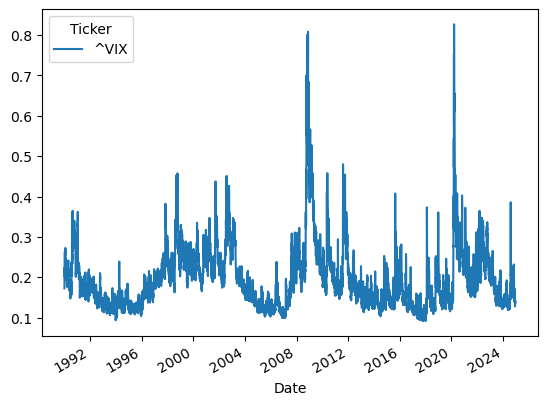

In [54]:
vix["Close"].plot()

<Axes: xlabel='Date'>

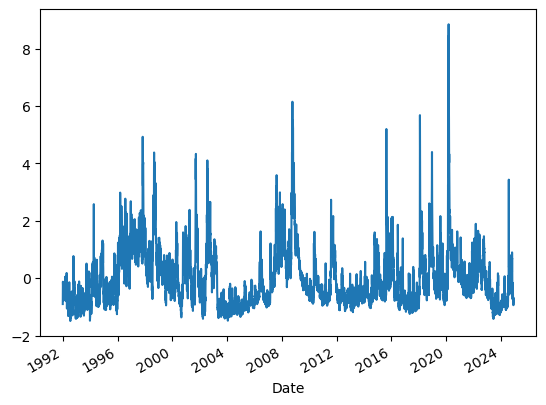

In [55]:
vix["close_returns"] = vix["Close"].pct_change()
vix["standardized_close"] = time_series_z_score(data=vix, statistic="Close", halflife=252)
vix["standardized_close"].plot()

In [56]:
spy["close_returns"] = spy["Close"].pct_change()

<Axes: xlabel='Date'>

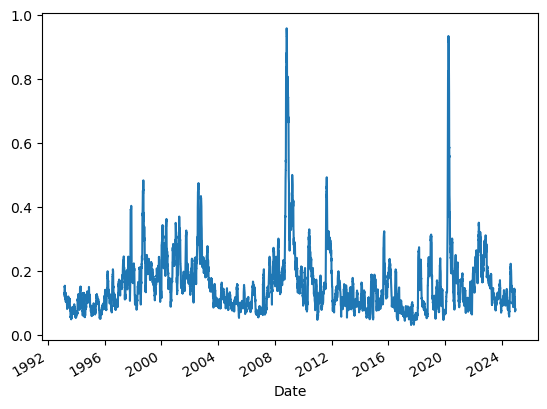

In [57]:
spy["realized_vol"] = spy["close_returns"].rolling(20).std() * np.sqrt(252)
spy["standardized_realized_vol"] = time_series_z_score(data=spy, statistic="realized_vol", halflife=252)
spy["realized_vol"].plot()

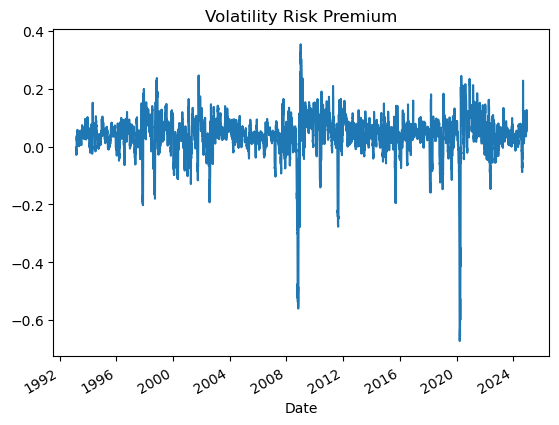

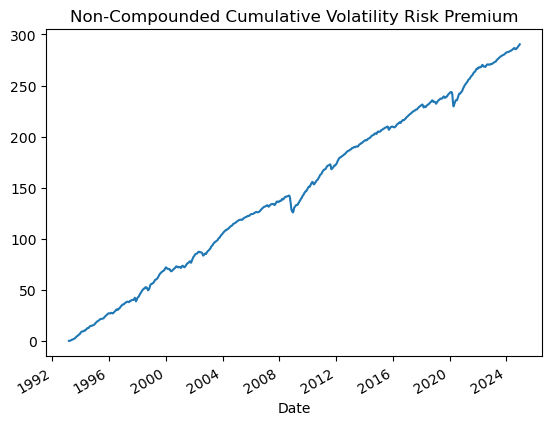

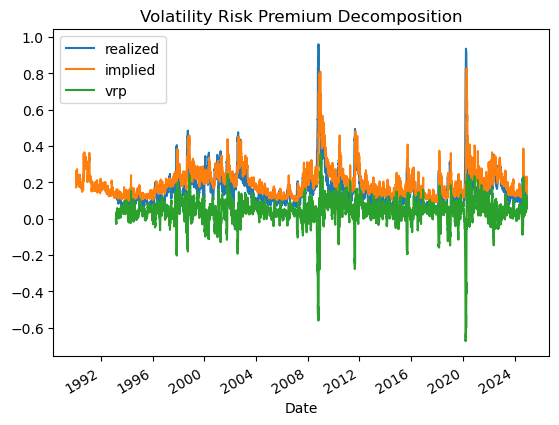

In [58]:
vrp = pd.concat([spy["realized_vol"], vix["Close"].shift(21)], axis=1)
vrp.columns = ["realized", "implied"]
vrp["vrp"] = vrp["implied"] - vrp["realized"]

vrp["vrp"].plot(title="Volatility Risk Premium")
plt.show()

vrp["vrp"].cumsum().plot(title="Non-Compounded Cumulative Volatility Risk Premium")
plt.show()

vrp.plot(title="Volatility Risk Premium Decomposition")
plt.show()

<Axes: xlabel='20_day_shifted_standardized_vix', ylabel='vrp'>

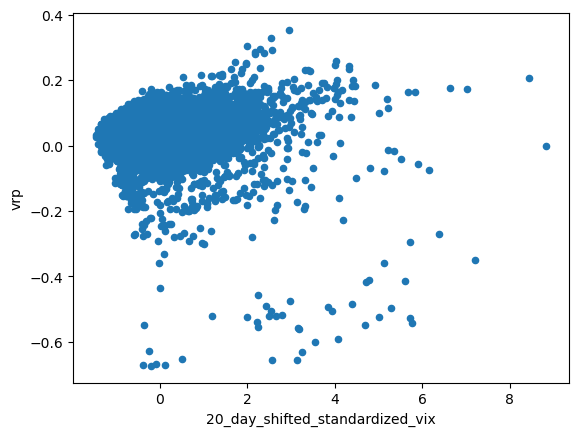

In [59]:
scatter_plot_data: pd.DataFrame = pd.concat([vix["standardized_close"].shift(21), vrp["vrp"]], axis=1)
scatter_plot_data.columns = ["20_day_shifted_standardized_vix", "vrp"]
scatter_plot_data.plot(kind="scatter", x="20_day_shifted_standardized_vix", y="vrp")

<Axes: title={'center': 'Conditional VRP Non-Compounded Cumulative Returns'}, xlabel='Date'>

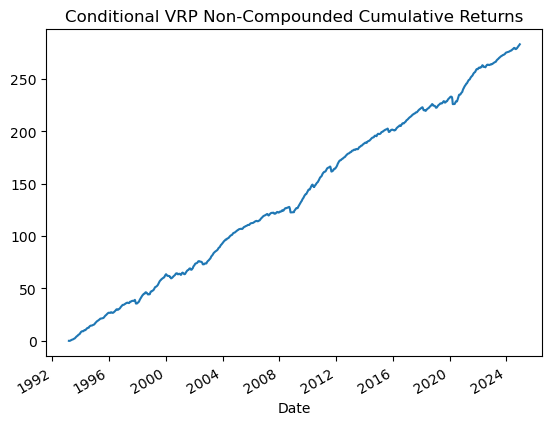

In [78]:
scatter_plot_data[scatter_plot_data["20_day_shifted_standardized_vix"] < 2.0]["vrp"].cumsum().plot(title="Conditional VRP Non-Compounded Cumulative Returns")

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

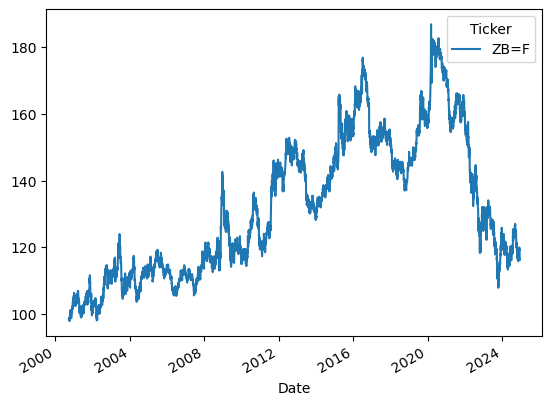

In [15]:
yf.download(tickers="ZB=F", period="max")["Close"].plot()